##TITLE : CAMPUS_RECRIUTEMENT

1. DIVYASREE . M
2. ARSHVANTH . V


**AIM :**To predict the differences in gender category depending upon the salary and placement.

**TASK :**The task associated with a campus recruitment dataset typically revolves around **analyzing and predicting job placement outcomes based on gender features.**

##***1. Data Preparation***

#Importing libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

# Dataset updation

In [53]:
sample = pd.read_csv('/content/Placement_Data_Full_Class 1.csv')

In [54]:
sample

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000


#Checking no of rows and columns

In [55]:
sample.shape

(215, 15)

#Checking Null Values

In [56]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          215 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 25.3+ KB


#Checking the datas from the Top

In [57]:
sample.head(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000


#Checking the datas from the Bottom

In [58]:
sample.tail(6)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
209,210,M,62.0,Central,72.0,Central,Commerce,65.0,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,Placed,216000
210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000
211,212,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000
212,213,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000
213,214,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000
214,215,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,0


## ***2. Data Analysis and Visualization***

## Plotting count plot to show the gender difference by salary category

In [59]:
sns.set(style="whitegrid")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 1.0, 'Count Plot of Gender by Salary')

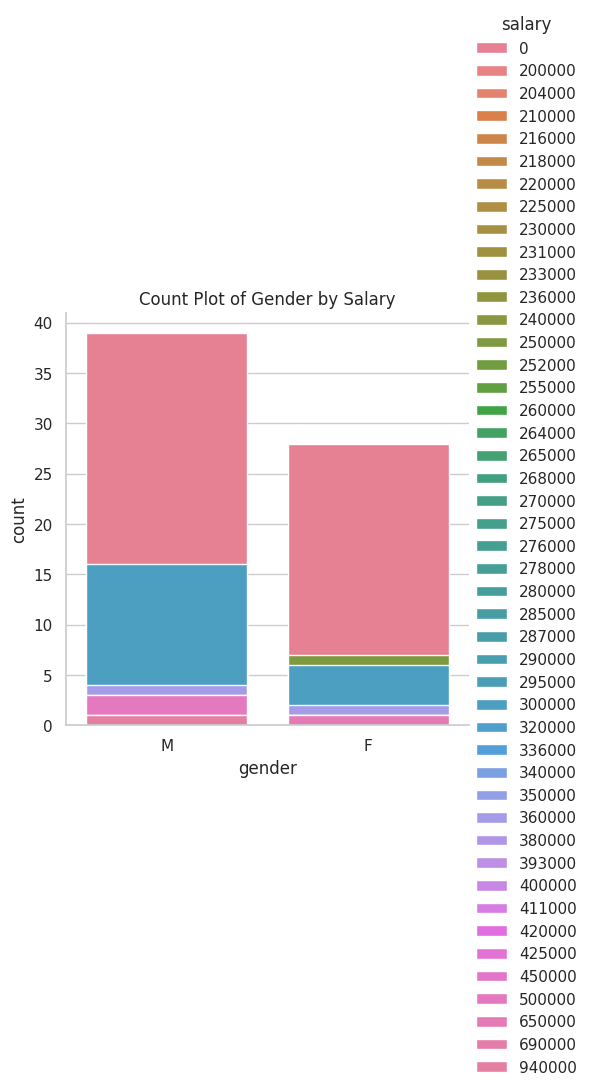

In [60]:
sns.FacetGrid(sample, hue='salary', height=5).map(sns.countplot,'gender') .add_legend()    # FacetGrid = It is used for creating a grid of subplots based on the values of one or more categorical variables.
                                                                                           # hue='salary' specifies that the color of the plot should represent different values in the 'salary' column.

plt.title('Count Plot of Gender by Salary')



#Making the count in gender wise

In [61]:
gender_counts = sample['gender'].value_counts()
print(gender_counts)

gender
M    139
F     76
Name: count, dtype: int64


## ***3. Data Preprocessing***

#(iloc) integer based access


In [62]:
X = sample.iloc[:, :-2].values
y = sample['salary'].values

In [63]:
X

array([[1, 'M', 67.0, ..., 55.0, 'Mkt&HR', 58.8],
       [2, 'M', 79.33, ..., 86.5, 'Mkt&Fin', 66.28],
       [3, 'M', 65.0, ..., 75.0, 'Mkt&Fin', 57.8],
       ...,
       [213, 'M', 67.0, ..., 59.0, 'Mkt&Fin', 69.72],
       [214, 'F', 74.0, ..., 70.0, 'Mkt&HR', 60.23],
       [215, 'M', 62.0, ..., 89.0, 'Mkt&HR', 60.22]], dtype=object)

In [64]:
y

array([270000, 200000, 250000,      0, 425000,      0,      0, 252000,
       231000,      0, 260000, 250000,      0, 218000,      0, 200000,
       300000,      0,      0, 236000, 265000, 393000, 360000, 300000,
       360000,      0, 240000, 265000, 350000,      0, 250000,      0,
       278000, 260000,      0, 300000,      0, 320000, 240000, 411000,
       287000,      0,      0, 300000, 200000,      0,      0, 204000,
       250000,      0, 200000,      0,      0, 450000, 216000, 220000,
       240000, 360000, 268000, 265000, 260000, 300000, 240000,      0,
       240000,      0, 275000, 275000,      0, 275000, 360000, 240000,
       240000, 218000, 336000,      0, 230000, 500000, 270000,      0,
       240000, 300000,      0, 300000, 300000, 400000, 220000,      0,
       210000, 210000, 300000,      0, 230000,      0, 260000, 420000,
       300000,      0, 220000,      0,      0, 380000, 300000, 240000,
       360000,      0,      0, 200000, 300000,      0, 250000,      0,
      

# Importing the ColumnTransformer

Applies different preprocessing steps to different subsets in a dataset.

when dealing with datasets having a mixed features type.

For eg: numeric, categorical, or text data

In [65]:
from sklearn.compose import ColumnTransformer

# Importing the OneHotEncoder

Transforms categorical data into a one-hot numeric array, which is suitable for machine learning algorithms that cannot handle categorical data directly.

Using to convert categorical variables into a format.

It is to handle categorical variables by representing them in a binary (0 or 1) format.



In [66]:
from sklearn.preprocessing import OneHotEncoder

'[1, 3, 5, 6, 8, 9, 11, 13]' : A list of column indices that will be one-hot encoded.

These data will be transformed using the OneHotEncoder.

'passthrough' means that columns not specified in the transformers list and the output as they are.

In [67]:
ct = ColumnTransformer(transformers=[ ('encoder', OneHotEncoder(), [1,3,5,6,8,9,11,13]) ], remainder='passthrough')

In [68]:
x = np.array(ct.fit_transform(sample))                      # converts the result into a NumPy array

In [69]:
x

array([[0.000e+00, 1.000e+00, 0.000e+00, ..., 5.500e+01, 5.880e+01,
        2.700e+05],
       [0.000e+00, 1.000e+00, 1.000e+00, ..., 8.650e+01, 6.628e+01,
        2.000e+05],
       [0.000e+00, 1.000e+00, 1.000e+00, ..., 7.500e+01, 5.780e+01,
        2.500e+05],
       ...,
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 5.900e+01, 6.972e+01,
        2.950e+05],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 7.000e+01, 6.023e+01,
        2.040e+05],
       [0.000e+00, 1.000e+00, 1.000e+00, ..., 8.900e+01, 6.022e+01,
        0.000e+00]])

# Importing the StandardScaler

StandardScalaer : It is used in data preprocessing to standardize features by removing the mean and scaling to unit variance.

In [70]:
from sklearn.preprocessing import StandardScaler


In [71]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Importing the train,test and split

Train Set : It is used to evaluate the model's performance after it has been trained.

Test set : It is portion of the dataset used to train the machine learning model.

Split Test : It is the process of dividing into two parts. One for testing and one for training the model.

In [72]:
from sklearn.model_selection import train_test_split


In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


## ***4. Model Training and Evaluation***

# Importing the Classifications

In [74]:
# used for binary and multi-class classification problems
from sklearn.linear_model import LogisticRegression

#used for both classification and regression tasks.
from sklearn.neighbors import KNeighborsClassifier

# used for classification and regression tasks
from sklearn.tree import DecisionTreeClassifier

#used for both classification and regression tasks.
# It operates by constructing multiple decision trees.
from sklearn.ensemble import RandomForestClassifier

#used for classification tasks
from sklearn.svm import SVC

# Implementing the classifiers

In [75]:
# statistical method for binary and multiclass classification problems.
# predicts the probability of a categorical dependent variable.
l_cla =  LogisticRegression()

# dataset splits into training and test sets
k_cla = KNeighborsClassifier()

# used for both classification and regression tasks.
d_cla = DecisionTreeClassifier()

# combines multiple decision trees to improve performance and robustness.
# combines multiple decision trees to achieve high accuracy and robustness.
r_cla = RandomForestClassifier()

# powerful classification tool that can handle linear and non-linear classification problems
s_cla = SVC(kernel = 'linear')
ks_cla = SVC(kernel = 'rbf')

#Fit the LogisticRegression model to the training data
l_cla.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Fitting (X_train,Y_train) for all classification

In [76]:
l_cla.fit(x_train,y_train)
k_cla.fit(x_train,y_train)
d_cla.fit(x_train,y_train)
r_cla.fit(x_train,y_train)
s_cla.fit(x_train,y_train)
ks_cla.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

# Predicting the classifications

In [77]:
l_pred = l_cla.predict(x_test)
k_pred = k_cla.predict(x_test)
d_pred = d_cla.predict(x_test)
r_pred = r_cla.predict(x_test)
s_pred = s_cla.predict(x_test)
ks_pred = ks_cla.predict(x_test)

# Importing the confusion matrix


 It helps in understanding the number of correct and incorrect predictions

In [78]:
from sklearn.metrics import confusion_matrix

In [79]:
l_c = confusion_matrix(y_test, l_pred)
k_c = confusion_matrix(y_test, k_pred)
d_c = confusion_matrix(y_test, d_pred)
r_c = confusion_matrix(y_test, r_pred)
s_c = confusion_matrix(y_test, s_pred)
ks_c = confusion_matrix(y_test, ks_pred)


## Importing the accuracy_score

In [80]:
from sklearn.metrics import accuracy_score

l_a = accuracy_score(y_test, l_pred)
k_a = accuracy_score(y_test, k_pred)
d_a = accuracy_score(y_test, d_pred)
r_a = accuracy_score(y_test, r_pred)
s_a = accuracy_score(y_test, s_pred)
ks_a = accuracy_score(y_test, ks_pred)

In [81]:
print('Logistic Regression: ' + str(l_a) + '\nKNN: ' + str(k_a) + '\nDecision Tree: ' + str(d_a) + '\nRandom Forest: ' + str(r_a) + '\nLinear SVC: ' + str(s_a) + '\nKernel SVC: ' + str(l_a))

Logistic Regression: 0.32558139534883723
KNN: 0.6744186046511628
Decision Tree: 0.6976744186046512
Random Forest: 0.46511627906976744
Linear SVC: 0.8372093023255814
Kernel SVC: 0.32558139534883723


## ***5. Results and Conclusion***

## **Result :** Linear SVC shows the best performance with an accuracy of (83.72%)

## **CONCLUSION :** From the taken Dataset corresponding to Aim, male gets a more placements and salary comparing to female. And Acccording to the accuracy score linear SVC classification got  the highest accuracy while comparing to other classification models .